In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [100]:
#Read the data
df = pd.read_csv("50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [101]:
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [103]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [104]:
#check for missing values
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [105]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


{'whiskers': [<matplotlib.lines.Line2D at 0x19fa544ca30>,
 'caps': [<matplotlib.lines.Line2D at 0x19fa544cfd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x19fa543f5b0>],
 'medians': [<matplotlib.lines.Line2D at 0x19fa54595b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x19fa5459880>],
 'means': []}

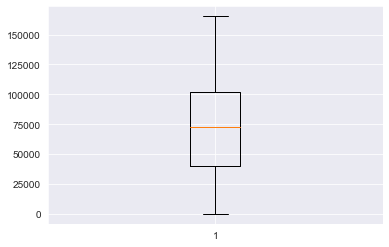

In [106]:
#Data visualizations
plt.boxplot(df['R&D Spend'])

{'whiskers': [<matplotlib.lines.Line2D at 0x19fa54b6760>,
 'caps': [<matplotlib.lines.Line2D at 0x19fa54b6d00>,
 'boxes': [<matplotlib.lines.Line2D at 0x19fa54b6490>],
 'medians': [<matplotlib.lines.Line2D at 0x19fa54c22e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x19fa54c25b0>],
 'means': []}

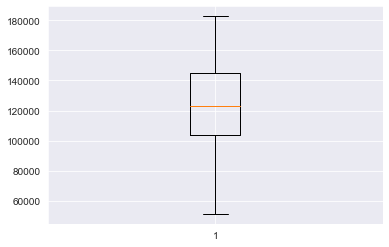

In [107]:
plt.boxplot(df['Administration'])

{'whiskers': [<matplotlib.lines.Line2D at 0x19fa5751f40>,
 'caps': [<matplotlib.lines.Line2D at 0x19fa575f520>,
 'boxes': [<matplotlib.lines.Line2D at 0x19fa5751c70>],
 'medians': [<matplotlib.lines.Line2D at 0x19fa575fac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x19fa575fd90>],
 'means': []}

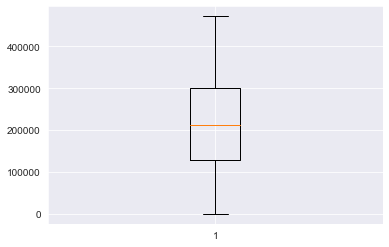

In [108]:
plt.boxplot(df['Marketing Spend'])

{'whiskers': [<matplotlib.lines.Line2D at 0x19fa57b4af0>,
 'caps': [<matplotlib.lines.Line2D at 0x19fa57c20d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x19fa57b4940>],
 'medians': [<matplotlib.lines.Line2D at 0x19fa57c2670>],
 'fliers': [<matplotlib.lines.Line2D at 0x19fa57c2940>],
 'means': []}

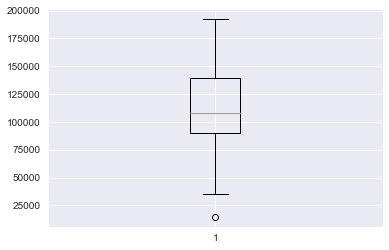

In [109]:
plt.boxplot(df['Profit'])

(array([6., 6., 4., 7., 8., 5., 3., 5., 3., 3.]),
 array([     0.  ,  16534.92,  33069.84,  49604.76,  66139.68,  82674.6 ,
         99209.52, 115744.44, 132279.36, 148814.28, 165349.2 ]),
 <BarContainer object of 10 artists>)

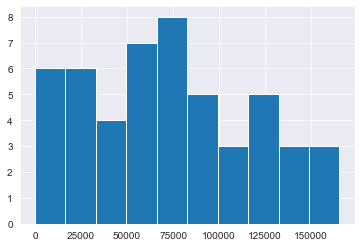

In [110]:
plt.hist(df['R&D Spend'])

(array([ 2.,  1.,  3.,  7.,  7., 12.,  4., 11.,  2.,  1.]),
 array([ 51283.14 ,  64419.382,  77555.624,  90691.866, 103828.108,
        116964.35 , 130100.592, 143236.834, 156373.076, 169509.318,
        182645.56 ]),
 <BarContainer object of 10 artists>)

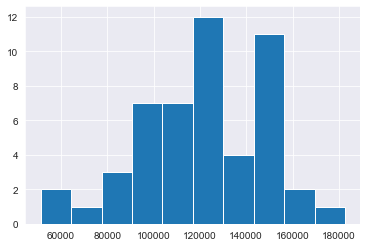

In [111]:
plt.hist(df['Administration'])

(array([8., 2., 6., 5., 6., 7., 9., 3., 2., 2.]),
 array([     0.  ,  47178.41,  94356.82, 141535.23, 188713.64, 235892.05,
        283070.46, 330248.87, 377427.28, 424605.69, 471784.1 ]),
 <BarContainer object of 10 artists>)

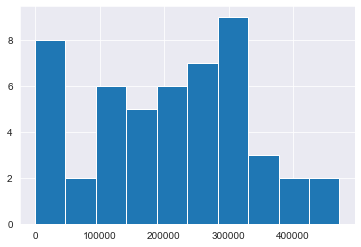

In [112]:
plt.hist(df['Marketing Spend'])

(array([ 1.,  3.,  2.,  6., 10.,  8.,  7.,  7.,  2.,  4.]),
 array([ 14681.4  ,  32439.443,  50197.486,  67955.529,  85713.572,
        103471.615, 121229.658, 138987.701, 156745.744, 174503.787,
        192261.83 ]),
 <BarContainer object of 10 artists>)

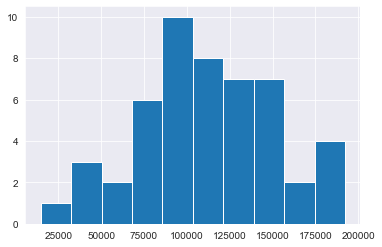

In [113]:
plt.hist(df['Profit'])

(array([17.,  0.,  0.,  0.,  0., 17.,  0.,  0.,  0., 16.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

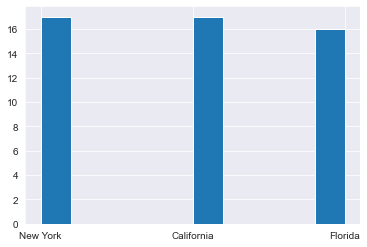

In [114]:
plt.hist(df['State'])

In [115]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['State']= label_encoder.fit_transform(df['State']) 

In [116]:
df['State']

0     2
1     0
2     1
3     2
4     1
5     2
6     0
7     1
8     2
9     0
10    1
11    0
12    1
13    0
14    1
15    2
16    0
17    2
18    1
19    2
20    0
21    2
22    1
23    1
24    2
25    0
26    1
27    2
28    1
29    2
30    1
31    2
32    0
33    1
34    0
35    2
36    1
37    0
38    2
39    0
40    0
41    1
42    0
43    2
44    0
45    2
46    1
47    0
48    2
49    0
Name: State, dtype: int32

In [117]:
#Correlation Matrix
df.corr()

,R&D Spend,Administration,Marketing Spend,State,Profit
R&D Spend,1.000000,0.241955,0.724248,0.104685,0.972900
Administration,0.241955,1.000000,-0.032154,0.011847,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.077670,0.747766
State,0.104685,0.011847,0.077670,1.000000,0.101796
Profit,0.972900,0.200717,0.747766,0.101796,1.000000


In [118]:
## administration & State have weak correlation with profit, so we can ignore those for regression model

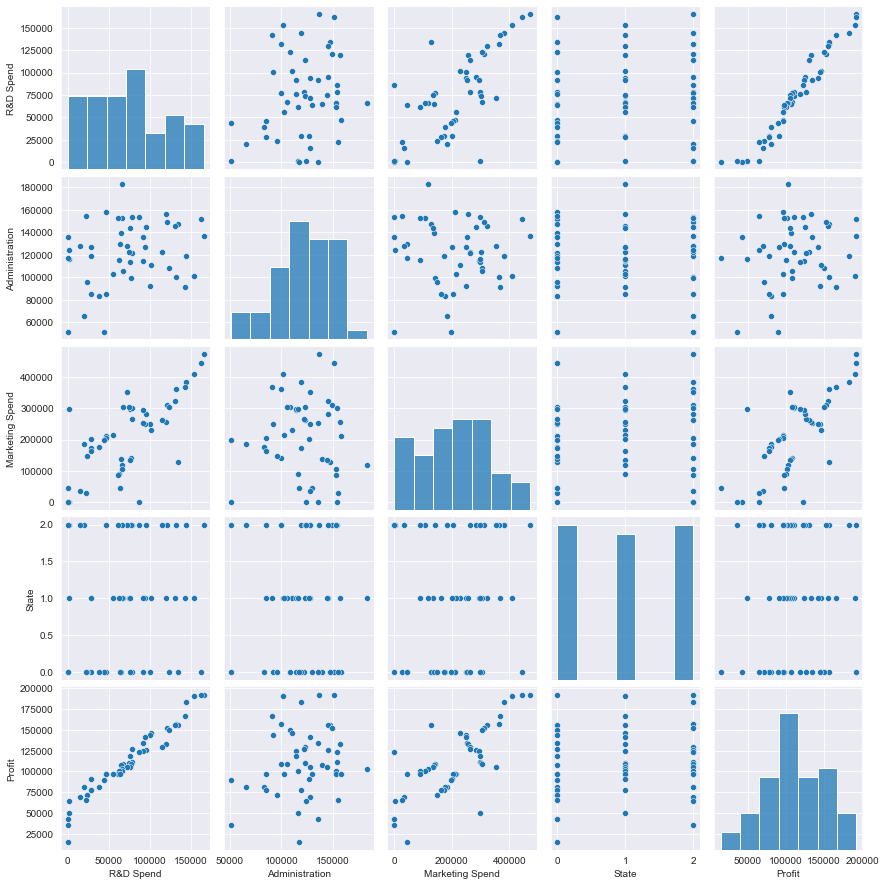

In [119]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(df)

In [120]:
X1 = df[["R&D Spend"]]
X2 = df[["R&D Spend","Marketing Spend"]] 
X3 = df[["R&D Spend","Administration","Marketing Spend","State"]]
X4 = df[["Marketing Spend"]]
#X5 = df[["State"]]
Y = df[["Profit"]]

In [121]:
# Building model Profit with R&D Spend
import statsmodels.formula.api as smf 
model1 = smf.ols("Y~X1",data=df).fit()

In [122]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Wed, 22 Feb 2023   Prob (F-statistic):           3.50e-32
Time:                        23:30:57   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
X1             0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [123]:
#Coefficients
model1.params

Intercept    49032.899141
X1               0.854291
dtype: float64

In [124]:
#t and p-Values
print(model1.tvalues, '\n', model1.pvalues)

Intercept    19.320288
X1           29.151139
dtype: float64 
 Intercept    2.782697e-24
X1           3.500322e-32
dtype: float64


In [125]:
Y_pred1 =model1.predict(X1)
Y_pred1

0     190289.293893
1     187938.711186
2     180116.657078
3     172369.003206
4     170433.973450
5     161694.196837
6     164033.725014
7     160345.467250
8     152011.333808
9     154396.822861
10    136096.363971
11    135036.085865
12    129219.890810
13    127621.204110
14    151499.374076
15    146869.430933
16    115678.825834
17    129897.694127
18    127413.414820
19    122860.503130
20    114175.913740
21    116000.346935
22    112245.813246
23    106725.356778
24    114850.932067
25    104275.402899
26    113385.702765
27    110633.799600
28    105460.142715
29    105079.094592
30    101994.248451
31    101261.181026
32    103202.541080
33     96440.901766
34     88694.290129
35     88342.279369
36     73520.101968
37     86681.477144
38     66314.863316
39     81973.101511
40     73597.475137
41     72861.580008
42     69229.141641
43     62279.310480
44     67979.151050
45     49887.386999
46     50156.685268
47     49032.899141
48     49495.967779
49     49032.899141


In [126]:
# model 1 metrics
from sklearn.metrics import mean_squared_error, r2_score
m1mse = mean_squared_error(Y,Y_pred1)
print("Model1 Mean square error:", m1mse)
m1r2 = r2_score(Y,Y_pred1)
print("Model1 R square:", m1r2)

import numpy as np
m1RMSE = np.sqrt(m1mse)
print("Model1 Root mean square error:", m1RMSE.round(2))


Model1 Mean square error: 85120931.32706906
Model1 R square: 0.9465353160804393
Model1 Root mean square error: 9226.1


In [127]:
##Multi linear regression model profit with R&D Spend and Marketing Spend
import statsmodels.formula.api as smf 
model2 = smf.ols('Y~X2',data=df).fit()

In [128]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Wed, 22 Feb 2023   Prob (F-statistic):           2.16e-31
Time:                        23:30:58   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
X2[0]          0.7966      0.041     19.266      0.000       0.713       0.880
X2[1]          0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [129]:
model2.params

Intercept    46975.864221
X2[0]            0.796584
X2[1]            0.029908
dtype: float64

In [130]:
#t and p-Values
print(model2.tvalues, '\n', model2.pvalues)

Intercept    17.463582
X2[0]        19.265555
X2[1]         1.927052
dtype: float64 
 Intercept    3.504062e-22
X2[0]        6.040433e-24
X2[1]        6.003040e-02
dtype: float64


In [131]:
# in the above model summary Meaketing spend p value is greater than 0.05, so we cann't consider this model.

In [132]:
# Multi linear regression model profit with 3 variables
import statsmodels.formula.api as smf 
model3 = smf.ols('Y~X3',data=df).fit()

In [133]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Wed, 22 Feb 2023   Prob (F-statistic):           8.51e-29
Time:                        23:30:59   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.014e+04   6804.555      7.369      0.000    3.64e+04    6.38e+04
X3[0]          0.8058      0.046     17.609      0.000       0.714       0.898
X3[1]         -0.0268      0.052     -0.520      0.606      -0.131       0.077
X3[2]          0.0272      0.017      1.637      0.109      -0.006       0.061
X3[3]        -22.3206   1609.829     -0.014      0.989   -3264.682    3220.041
==============================================================================
Omnibus:                       14.864   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.542
Skew:                          -0.949   Prob(JB):                     2.10e-05
Kurtosis:                       5.596   Cond. No.                     1.44e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [134]:
model3.params

Intercept    50142.506443
X3[0]            0.805760
X3[1]           -0.026826
X3[2]            0.027228
X3[3]          -22.320577
dtype: float64

In [135]:
#t and p-Values
print(model3.tvalues, '\n', model3.pvalues)

Intercept     7.368962
X3[0]        17.608621
X3[1]        -0.519906
X3[2]         1.636966
X3[3]        -0.013865
dtype: float64 
 Intercept    2.900008e-09
X3[0]        8.249206e-22
X3[1]        6.056771e-01
X3[2]        1.086131e-01
X3[3]        9.889988e-01
dtype: float64


In [136]:
# in the above model summary p value is greater than 0.05 for Marketing Spend and Administration, state
## so we cann't consider this model.

In [137]:
#Simple linear regression model Profit with Marketing Spend
import statsmodels.formula.api as smf 
model4 = smf.ols('Y~X4',data=df).fit()

In [138]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Wed, 22 Feb 2023   Prob (F-statistic):           4.38e-10
Time:                        23:30:59   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept       6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
X4             0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [139]:
## based on above models summaries and R square values
## we can only consider R&D Spend variable for Profit prediction

# Applying transformations

In [140]:
# applying logerithmic transformation on dependent variable
import statsmodels.formula.api as smf
model_exp = smf.ols('np.log(Y)~X1',data=df).fit()
model_exp.params

Intercept    10.894487
X1            0.000009
dtype: float64

In [141]:
model_exp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              np.log(Y)   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     150.9
Date:                Wed, 22 Feb 2023   Prob (F-statistic):           2.00e-16
Time:                        23:31:00   Log-Likelihood:                 3.5786
No. Observations:                  50   AIC:                            -3.157
Df Residuals:                      48   BIC:                            0.6668
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.8945      0.062    175.821      0.000      10.770      11.019
X1          8.788e-06   7.16e-07     12.282      0.000    7.35e-06    1.02e-05
==============================================================================
Omnibus:                       74.537   Durbin-Watson:                   0.520
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              926.677
Skew:                          -3.902   Prob(JB):                    5.95e-202
Kurtosis:                      22.593   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [142]:
Y_pred_exp = model_exp.predict(pd.DataFrame(df['R&D Spend']))
Y_pred_exp

0     12.347601
1     12.323420
2     12.242954
3     12.163254
4     12.143348
5     12.053441
6     12.077508
7     12.039567
8     11.953833
9     11.978373
10    11.790115
11    11.779208
12    11.719376
13    11.702930
14    11.948566
15    11.900938
16    11.580078
17    11.726349
18    11.700793
19    11.653957
20    11.564618
21    11.583386
22    11.544763
23    11.487973
24    11.571562
25    11.462770
26    11.556489
27    11.528180
28    11.474958
29    11.471038
30    11.439304
31    11.431763
32    11.451734
33    11.382176
34    11.302487
35    11.298865
36    11.146389
37    11.281781
38    11.072268
39    11.233345
40    11.147185
41    11.139615
42    11.102247
43    11.030754
44    11.089389
45    10.903278
46    10.906048
47    10.894487
48    10.899251
49    10.894487
dtype: float64

In [143]:
Y_pred_ex=np.exp(Y_pred_exp)  # as we have used log(Y) in preparing model so we need to convert it back
Y_pred_ex

0     230406.590193
1     224902.042180
2     207514.035016
3     191616.958708
4     187840.387514
5     171689.217444
6     175871.363893
7     169323.570192
8     155411.703196
9     159272.635322
10    131941.606283
11    130510.319518
12    122930.694292
13    120925.535220
14    154595.369346
15    147404.818102
16    106945.883752
17    123790.836748
18    120667.327930
19    115146.048998
20    105305.157370
21    107300.193716
22    103234.936781
23     97535.659251
24    106038.936471
25     95108.202502
26    104452.606868
27    101537.119862
28     96274.425296
29     95897.781125
30     92902.340354
31     92204.388487
32     94064.302737
33     87743.800523
34     81022.859320
35     80729.993414
36     69313.070733
37     79362.454782
38     64361.315101
39     75610.112541
40     69368.261925
41     68845.113009
42     66320.040408
43     61744.121291
44     65472.708270
45     54354.220890
46     54505.006513
47     53878.531782
48     54135.800710
49     53878.531782


In [144]:
# model 6 metrics
from sklearn.metrics import mean_squared_error, r2_score
mse_exp = mean_squared_error(Y,Y_pred_ex)
print("Exponential Model Mean square error:", mse_exp)
r2_exp = r2_score(Y,Y_pred_ex)
print("Exponential Model R square:", r2_exp)

import numpy as np
RMSE_exp = np.sqrt(mse_exp)
print("Exponential Model Root mean square error:", RMSE_exp.round(2))

Exponential Model Mean square error: 219852178.33372843
Exponential Model R square: 0.861910260609405
Exponential Model Root mean square error: 14827.41


In [145]:
#np.seterr(divide = 'ignore')
#X6 = np.where(df["R&D Spend"]>0, np.log(df["R&D Spend"]), 0) 

In [146]:
# applying logerithmic transformation on independent variable
model_log = smf.ols('Y~np.log(X1+1)',data=df).fit()
model_log.params

Intercept        -10852.947367
np.log(X1 + 1)    11754.364633
dtype: float64

In [147]:
model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     51.26
Date:                Wed, 22 Feb 2023   Prob (F-statistic):           4.19e-09
Time:                        23:31:01   Log-Likelihood:                -582.49
No. Observations:                  50   AIC:                             1169.
Df Residuals:                      48   BIC:                             1173.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1.085e+04   1.76e+04     -0.616      0.541   -4.63e+04    2.46e+04
np.log(X1 + 1)  1.175e+04   1641.772      7.160      0.000    8453.361    1.51e+04
==============================================================================
Omnibus:                        5.162   Durbin-Watson:                   0.463
Prob(Omnibus):                  0.076   Jarque-Bera (JB):                5.090
Skew:                           0.759   Prob(JB):                       0.0785
Kurtosis:                       2.624   Cond. No.                         47.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [148]:
Y_pred_log=model_log.predict(pd.DataFrame(df['R&D Spend']))

In [149]:
# log model  metrics
from sklearn.metrics import mean_squared_error, r2_score
mse_log = mean_squared_error(Y,Y_pred_log)
print("log Model Mean square error:", mse_log)
r2_log = r2_score(Y,Y_pred_log)
print("log Model R square:", r2_log)

import numpy as np
RMSE_log = np.sqrt(mse_log)
print("log Model Root mean square error:", RMSE_log.round(2))

log Model Mean square error: 769909039.81985
log Model R square: 0.5164180793250943
log Model Root mean square error: 27747.23


In [150]:
# applying polynomial transformation
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=5)

In [151]:
poly_X = poly.fit_transform(X1)

In [152]:
poly_X

array([[1.00000000e+00, 1.65349200e+05, 2.73403579e+10, 4.52070631e+15,
        7.47495172e+20, 1.23597729e+26],
       [1.00000000e+00, 1.62597700e+05, 2.64380120e+10, 4.29875995e+15,
        6.98968481e+20, 1.13650667e+26],
       [1.00000000e+00, 1.53441510e+05, 2.35442970e+10, 3.61267248e+15,
        5.54333921e+20, 8.50578339e+25],
       [1.00000000e+00, 1.44372410e+05, 2.08433928e+10, 3.00921085e+15,
        4.34447022e+20, 6.27221636e+25],
       [1.00000000e+00, 1.42107340e+05, 2.01944961e+10, 2.86978612e+15,
        4.07817672e+20, 5.79538846e+25],
       [1.00000000e+00, 1.31876900e+05, 1.73915168e+10, 2.29353932e+15,
        3.02464855e+20, 3.98881274e+25],
       [1.00000000e+00, 1.34615460e+05, 1.81213221e+10, 2.43941011e+15,
        3.28382314e+20, 4.42053362e+25],
       [1.00000000e+00, 1.30298130e+05, 1.69776027e+10, 2.21214988e+15,
        2.88238993e+20, 3.75570018e+25],
       [1.00000000e+00, 1.20542520e+05, 1.45304991e+10, 1.75154298e+15,
        2.11135405e+20, 

In [153]:
from sklearn.linear_model import LinearRegression
model_p = LinearRegression()
model_p.fit(poly_X,Y)

LinearRegression()

In [154]:
model_p.coef_


array([[ 0.00000000e+00, -1.45353198e-15,  8.53723849e-15,
         3.43374412e-10, -3.89058927e-15,  1.21062645e-20]])

In [155]:
model_p.intercept_

array([62755.68249601])

In [156]:
y_pred_p = model_p.predict(poly_X)
y_pred_p

array([[203160.65263834],
       [195325.61991288],
       [176302.00090774],
       [165117.86642745],
       [163120.79993689],
       [156428.09729289],
       [157947.47907492],
       [155606.81080701],
       [150863.62342339],
       [152214.87992689],
       [139614.74152585],
       [138661.78264321],
       [132924.88099888],
       [131201.1600692 ],
       [150568.63676673],
       [147759.38074059],
       [116661.93084623],
       [133637.09184264],
       [130972.67801716],
       [125725.38575904],
       [114674.68294972],
       [117083.81976736],
       [112091.41009704],
       [104594.94911535],
       [115570.18960336],
       [101263.80422062],
       [113620.8259462 ],
       [109913.59202929],
       [102872.46945078],
       [102354.49863705],
       [ 98187.38948287],
       [ 97206.95394169],
       [ 99812.74290658],
       [ 90911.54025267],
       [ 81652.43665213],
       [ 81264.99870944],
       [ 68450.23511358],
       [ 79482.59925176],
       [ 649

In [157]:
from sklearn.metrics import r2_score, mean_squared_error
r2_p=r2_score(Y,y_pred_p)
r2_p

0.9088995842423598

In [158]:
MSE_p=mean_squared_error(Y,y_pred_p)
MSE_p

145040644.8720521

In [159]:
RMSE_p = np.sqrt(MSE_p)
RMSE_p

12043.282146991829

In [160]:
data = {"MODEL":pd.Series(["rmse_lin","rmse_log","rmse_exp","rmse_poly"]),
        "RMSE_Values":pd.Series([m1RMSE,RMSE_log,RMSE_exp,RMSE_p]),
        "Rsquare":pd.Series([m1r2,r2_log,r2_exp,r2_p])}
table=pd.DataFrame(data)
table

,MODEL,RMSE_Values,Rsquare
0,rmse_lin,9226.100548,0.946535
1,rmse_log,27747.234814,0.516418
2,rmse_exp,14827.413070,0.861910
3,rmse_poly,12043.282147,0.908900


In [161]:
## As per above model results, linear regression model gave good R2 , RMSE values comparative to other transformations

# Residual Analysis


# Test for Normality of Residuals (Q-Q Plot)

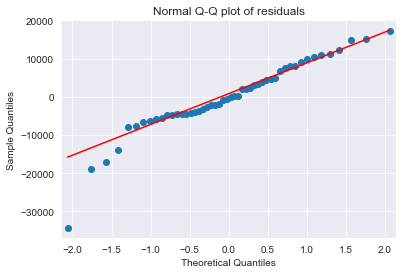

In [162]:
import statsmodels.api as sm
qqplot=sm.qqplot(model1.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

# Residual Plot for Homoscedasticity

In [163]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

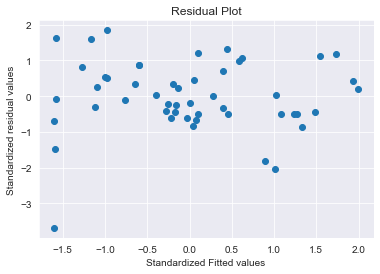

In [164]:
plt.scatter(get_standardized_values(model1.fittedvalues),
            get_standardized_values(model1.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# Model Deletion Diagnostics

# Detecting Influencers/Outliers

# Cook’s Distance

In [165]:
model_influence = model1.get_influence()
(c, _) = model_influence.cooks_distance

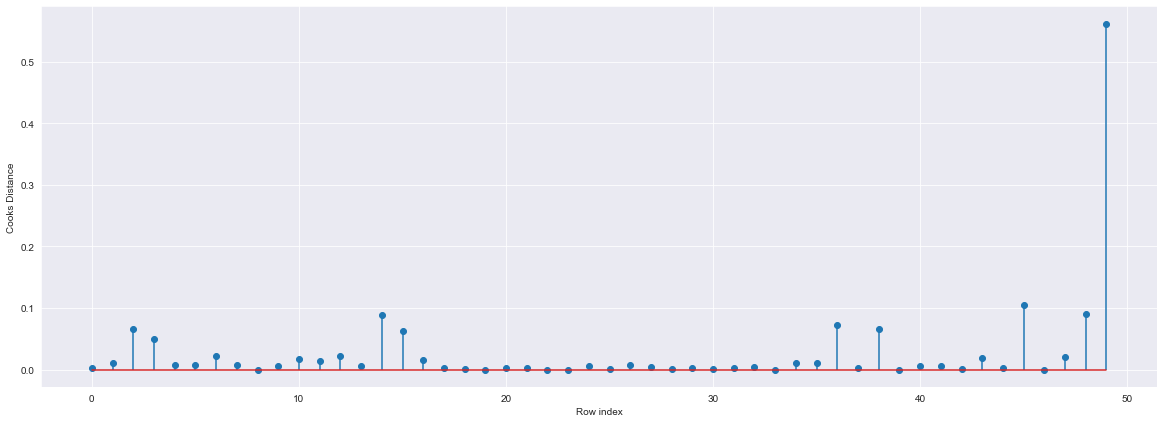

In [166]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [167]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(49, 0.562061025926427)

# High Influence points

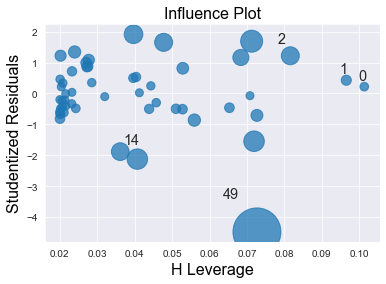

In [168]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model1)
plt.show()

In [169]:
k = df.shape[1]
n = df.shape[0]
leverage_cutoff = 3*((k + 1)/n)

In [170]:
leverage_cutoff

0.36

In [171]:
df.shape

(50, 5)

In [172]:
##From the above plot, it is evident that all data points are under leverage cutoff value

In [173]:
df[df.index.isin([49])]

,R&D Spend,Administration,Marketing Spend,State,Profit
49,0.0,116983.8,45173.06,0,14681.4


In [174]:
#See the differences with other variable values
df.describe()

,R&D Spend,Administration,Marketing Spend,State,Profit
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,1.000000,112012.639200
std,45902.256482,28017.802755,122290.310726,0.832993,40306.180338
min,0.000000,51283.140000,0.000000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,0.000000,90138.902500
50%,73051.080000,122699.795000,212716.240000,1.000000,107978.190000
75%,101602.800000,144842.180000,299469.085000,2.000000,139765.977500
max,165349.200000,182645.560000,471784.100000,2.000000,192261.830000


In [175]:
#Load the data
df_new = df

In [176]:
df_new

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94
5,131876.90,99814.71,362861.36,2,156991.12
6,134615.46,147198.87,127716.82,0,156122.51
7,130298.13,145530.06,323876.68,1,155752.60
8,120542.52,148718.95,311613.29,2,152211.77
9,123334.88,108679.17,304981.62,0,149759.96


In [177]:
#Discard the data points which are influencers and reasign the row number (reset_index())
df1=df_new.drop(df_new.index[[49]],axis=0).reset_index()

In [178]:
df1

,index,R&D Spend,Administration,Marketing Spend,State,Profit
0,0,165349.20,136897.80,471784.10,2,192261.83
1,1,162597.70,151377.59,443898.53,0,191792.06
2,2,153441.51,101145.55,407934.54,1,191050.39
3,3,144372.41,118671.85,383199.62,2,182901.99
4,4,142107.34,91391.77,366168.42,1,166187.94
5,5,131876.90,99814.71,362861.36,2,156991.12
6,6,134615.46,147198.87,127716.82,0,156122.51
7,7,130298.13,145530.06,323876.68,1,155752.60
8,8,120542.52,148718.95,311613.29,2,152211.77
9,9,123334.88,108679.17,304981.62,0,149759.96


In [179]:
#Drop the original index
df1=df1.drop(['index'],axis=1)

In [180]:
df1

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94
5,131876.90,99814.71,362861.36,2,156991.12
6,134615.46,147198.87,127716.82,0,156122.51
7,130298.13,145530.06,323876.68,1,155752.60
8,120542.52,148718.95,311613.29,2,152211.77
9,123334.88,108679.17,304981.62,0,149759.96


# Build Model

In [181]:
df1.rename(columns = {'R&D Spend':'RDSpend'}, inplace = True)

In [182]:
df1.rename(columns = {'Marketing Spend':'MarketingSpend'}, inplace = True)

In [183]:
final_ml= smf.ols('Profit~RDSpend',data = df1).fit()

In [184]:
final_ml.rsquared

0.9573395972488337

Cooks's distance

In [185]:
model_influence1 = final_ml.get_influence()
(c_1, _) = model_influence1.cooks_distance

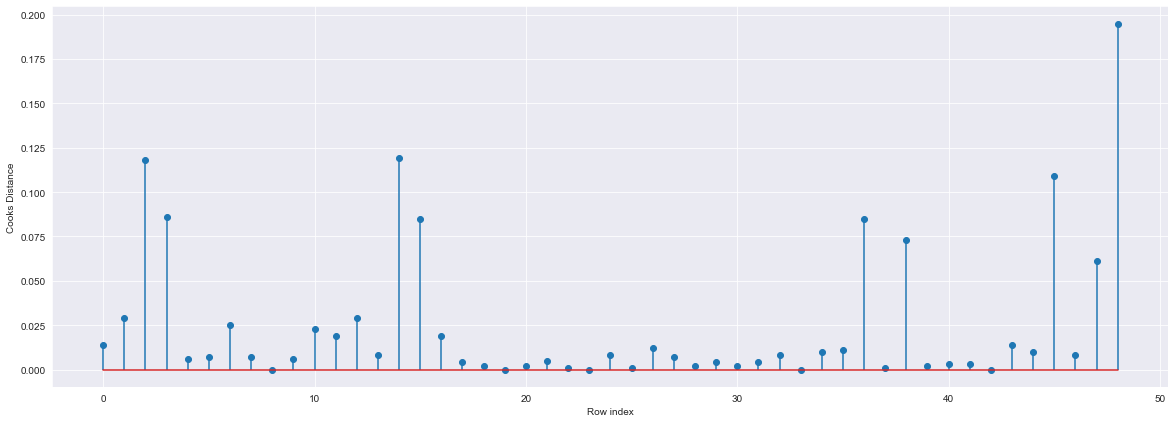

In [186]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df1)),np.round(c_1,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [187]:
#index of the data points where c is more than .5
(np.argmax(c_1),np.max(c_1))

(48, 0.19525888916997977)

In [188]:
## Since the value is < 0.5 , we can stop the diagnostic process and finalize the model

# Predicting for new data

In [189]:
#New data for prediction
new_data=pd.DataFrame({"RDSpend":120056.35,"Administration":125875.78,"MarketingSpend":165985.56,"State":'California'},index=[1])

In [190]:
final_ml.predict(new_data)

1    151111.286958
dtype: float64